# Lecture notes from the third week

Programming for the Behavioral Sciences

This week will be all about plotting and visualizing data.
For this purpose we'll use matplotlib. There are already many good tutorials on matplotlib, e.g, 
<a href="https://www.labri.fr/perso/nrougier/teaching/matplotlib/">here</a>, and  <a href="https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python#gs.=lpQ9qw">here</a>.

The official documentation is located at http://matplotlib.org/.

We will also have a look at a package for statistical plotting (http://seaborn.pydata.org) and how you can work with images.

Note that you may have to install the matplotlib package before being able to import it. For information about how to install packages in MiniForge, have a look <a href="https://kirenz.github.io/codelabs/codelabs/miniforge-setup/#6">here</a> and <a href="https://anaconda.org/conda-forge/matplotlib">here</a>.


### Basic plotting
It's very quick and easy to construct simple plots with Matplotlib.

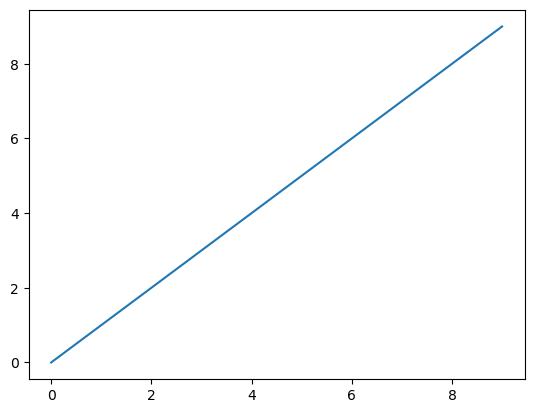

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# A very basic plot
y = range(10)
plt.plot(y)
plt.show()

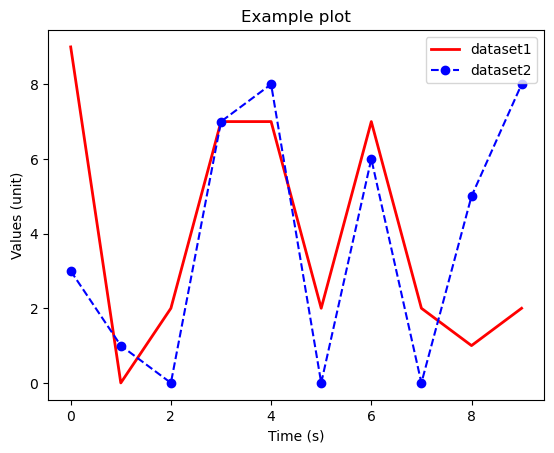

<Figure size 640x480 with 0 Axes>

In [16]:
# Generate some more data to plot
x = np.arange(10)
y1 = np.random.randint(10, size=10)
y2 = np.random.randint(10, size=10)

# Plot...
plt.plot(x, y1, c='r', lw = 2, label='dataset1')
plt.plot(x, y2, 'o--', c = 'b', label='dataset2')

# ...and annotate the plot
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Values (unit)')
plt.title('Example plot')
plt.show()

# Save the plot as a pdf-figure
plt.savefig('my_figure.pdf')

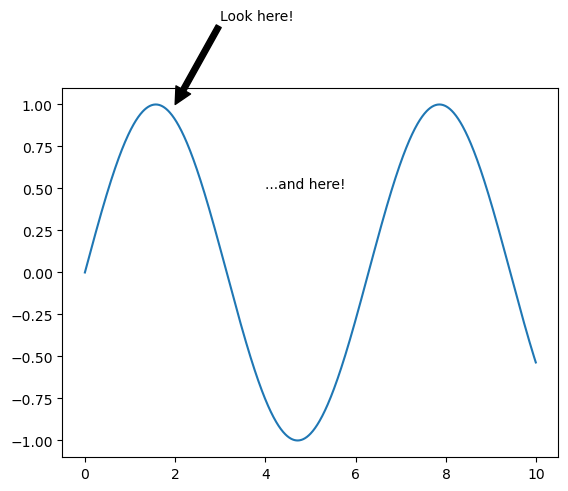

In [17]:
# Including text and arrows
x = np.arange(0, 10, 0.01)
y = np.sin(x)

plt.plot(x, y)

# Add text at a certain position
x_text, y_text = 4, 0.5
plt.text(x_text, y_text, '...and here!')

# And add an arrow
plt.annotate('Look here!', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black'))
plt.show()

### Advanced plotting

While the above way to plot using pyplot is simple and fast, the recommended way to produce plots when you become more experienced is a bit different. The example above would instead look like:

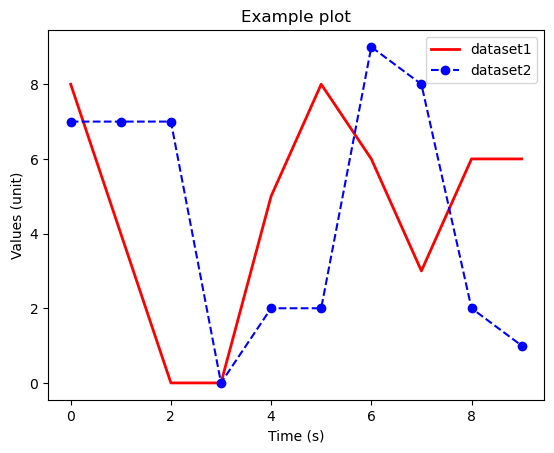

In [18]:
# Generate a figure and and axis
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate some more data to plot
x = np.arange(10)
y1 = np.random.randint(10, size=10)
y2 = np.random.randint(10, size=10)

# Plot on the axis!
ax.plot(x, y1, c='r', lw = 2, label='dataset1')
ax.plot(x, y2, 'o--', c = 'b', label='dataset2')

# ...and annotate the plot (a plot is what you think of the 'axis')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Values (unit)')
ax.set_title('Example plot')

# Show the plot
plt.show()

So why is this approach better? When your plots become more complex, this approach helps you to better keep track of what's going on, and gain better control of your plotting. We won't go into details here, but the interested reader is referred to:
http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure

### Working with images
Matplotlib can also used to display images. In fact, an image is just an array with more than two dimensions. A 512 x 512 pixel large gray image, for instance, can be represented by a numpy array of the same size. However, one of the most used packages for dealing with images is <a href="https://opencv.org/">openCV</a>, and we will use a combination of matplotlib and openCV below.

The image in this examples is located in the folder 'img' and called 'baboon.bmp'.
Let's start by opening and looking at an image. 

You need to install the openCV (cv2) package before importing it.




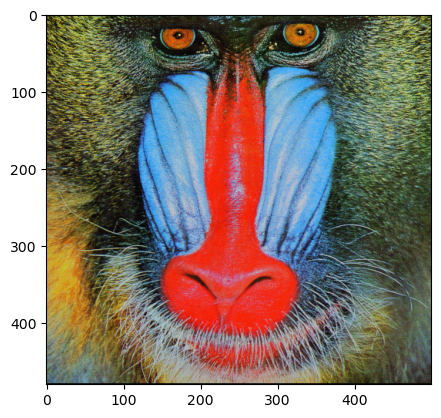

In [19]:
import cv2
import matplotlib.pyplot as plt

im_bgr = cv2.imread('baboon.bmp')

# Convert to RGB (since opencv uses BGR)
im = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.show()


In [20]:
# Get some information about the image
print(im.shape, type(im))
im_sz = im.shape

(480, 500, 3) <class 'numpy.ndarray'>


So images are just numbers in a numpy array. Let's convince ourselves that this is the case by plotting the 20th row in the red-component image as a 'normal' plot of a 1-dimensional signal. The red-component is the first color in an RGB image, i.e., the one with index 0. Note that color images are three-dimensional arrays where the third dimension comprises the color information (R [Red], G[Green], and B[Blue]).

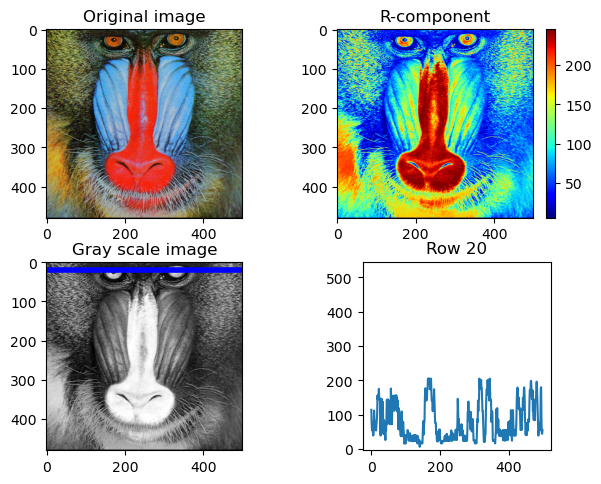

In [21]:
im_r = im[:, :, 0]  # Select the R-component, i.e., the part of the image that contains information 
                    # about how much of the color red the image contains.
row_to_plot = 20    # Remember that the zero'th row is at the top of the image

# Create a 2 x 2 subplot
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.tight_layout() # This is added to make a bit more space between the subplots
ax[0, 0].imshow(im)
ax[0, 0].set_title('Original image')

cax = ax[0, 1].imshow(im_r, cmap = 'jet')
ax[0, 1].set_title('R-component')

ax[1, 0].imshow(im_r, cmap='gray')
ax[1, 0].plot(20 * np.ones(im_sz[1]), c='b', lw=4)
ax[1, 0].set_title('Gray scale image')

ax[1, 1].plot(im_r[20, :])
ax[1, 1].axis('square')
ax[1, 1].set_title('Row 20')

# Add a colorbar to the red componenet 
fig.colorbar(cax, ax = ax[0, 1])
plt.show()

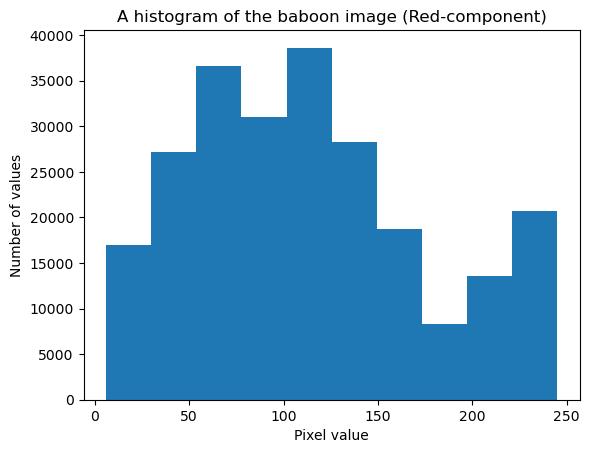

In [22]:
# Compute the histogram of the image and plot it. What does this mean?
plt.hist(im_r.flatten(), bins=10) # histogram of the Red component
plt.xlabel('Pixel value')
plt.ylabel('Number of values')
plt.title('A histogram of the baboon image (Red-component)')
plt.show()